In [0]:
import os
os.chdir("CreditCard/datasets/mlg-ulb/creditcardfraud")

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
credit_card_data = pd.read_csv("creditcard.csv")


In [8]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0.5, 1.0, 'Heatmap of Correlation')

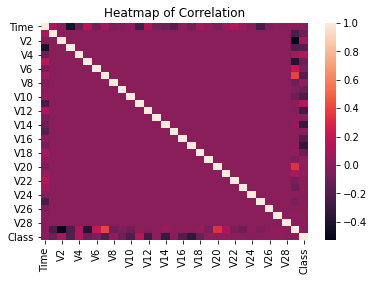

In [9]:
sns.heatmap(data = credit_card_data.corr())
plt.title("Heatmap of Correlation")

Text(0.5, 1.0, 'Counts of non-fraud vs fraud transactions')

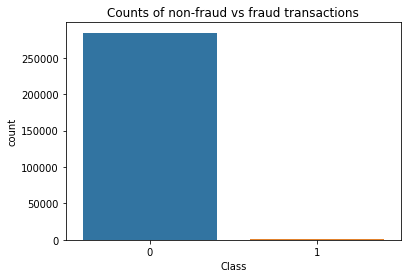

In [10]:
sns.countplot(x = "Class", data = credit_card_data)
plt.title("Counts of non-fraud vs fraud transactions")

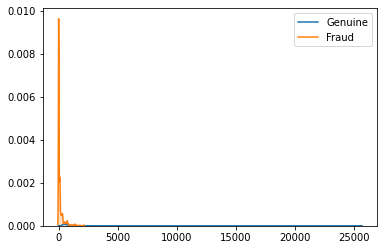

In [18]:
sns.kdeplot(data = credit_card_data[credit_card_data["Class"] == 0]["Amount"], label = "Genuine", shade = True)
sns.kdeplot(data = credit_card_data[credit_card_data["Class"] == 1]["Amount"], label = "Fraud", shade = True)
plt.legend()

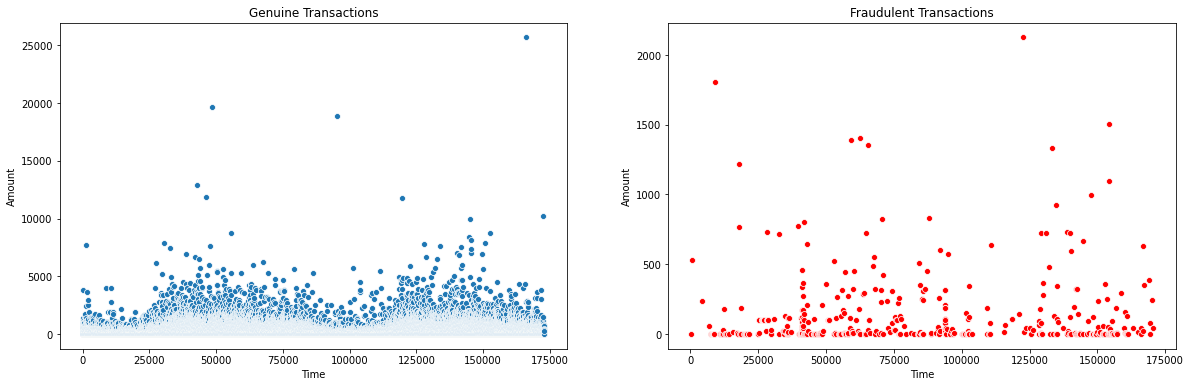

In [24]:
f, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 6))
sns.scatterplot(x = "Time", y = "Amount",ax = ax1, data = credit_card_data[credit_card_data["Class"] == 0])
ax1.set_title("Genuine Transactions")
sns.scatterplot(x = "Time", y = "Amount", ax = ax2, data = credit_card_data[credit_card_data["Class"] == 1], color = "red")
ax2.set_title("Fraudulent Transactions")
plt.show()

In [40]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
genuine = credit_card_data[credit_card_data["Class"] == 0]
fraud = credit_card_data[credit_card_data["Class"] == 1]
length = len(fraud.index)
genuine = genuine.loc[:length,:].sample(frac = 1, random_state = 42)

fraud.head()




,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


Text(0.5, 1.0, 'Counts of non-fraud vs fraud transactions')

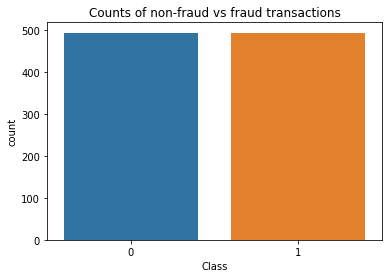

In [41]:
final_df = pd.concat([fraud,genuine]).sample(frac = 1, random_state = 42)
sns.countplot(x = "Class", data = final_df)
plt.title("Counts of non-fraud vs fraud transactions")

In [44]:
y_df = final_df["Class"]
x_df = final_df.drop(columns = ["Class"])
x_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
405,292.0,1.252189,-0.126779,0.280285,0.579416,-0.374125,-0.215217,-0.193078,0.011076,0.770448,-0.197201,-1.577764,-0.377882,-0.989382,0.052592,0.055325,0.118796,-0.229318,-0.336750,0.572051,-0.122255,-0.360296,-0.959573,-0.023837,-0.462201,0.381732,0.340518,-0.034929,0.007525,23.88
248296,153875.0,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,-4.230984,4.436319,-4.503801,-0.954361,-9.861372,-0.505329,0.269282,0.591319,1.795992,-1.085208,0.354773,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,0.00
81,52.0,1.147369,0.059035,0.263632,1.211023,-0.044096,0.301067,-0.132960,0.227885,0.252191,0.083904,0.645046,0.413362,-1.468036,0.502861,-0.626936,-0.369716,-0.031799,-0.215342,0.055020,-0.255924,-0.087813,-0.110756,-0.097771,-0.323374,0.633279,-0.305328,0.027394,-0.000580,6.67
239501,150139.0,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,-2.796332,-0.448794,-2.562602,0.243483,-1.181669,0.004373,-2.302596,-4.446192,-1.710463,0.982729,-1.928527,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,237.26
143336,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,6.348979,-8.681609,0.251179,-11.608002,-0.351569,-5.363566,-11.939092,-3.583603,0.897402,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92


ERROR! Session/line number was not unique in database. History logging moved to new session 64


In [45]:
reduce_df = x_df[["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28"]]
reduce_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
405,1.252189,-0.126779,0.280285,0.579416,-0.374125,-0.215217,-0.193078,0.011076,0.770448,-0.197201,-1.577764,-0.377882,-0.989382,0.052592,0.055325,0.118796,-0.229318,-0.336750,0.572051,-0.122255,-0.360296,-0.959573,-0.023837,-0.462201,0.381732,0.340518,-0.034929,0.007525
248296,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,-4.230984,4.436319,-4.503801,-0.954361,-9.861372,-0.505329,0.269282,0.591319,1.795992,-1.085208,0.354773,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345
81,1.147369,0.059035,0.263632,1.211023,-0.044096,0.301067,-0.132960,0.227885,0.252191,0.083904,0.645046,0.413362,-1.468036,0.502861,-0.626936,-0.369716,-0.031799,-0.215342,0.055020,-0.255924,-0.087813,-0.110756,-0.097771,-0.323374,0.633279,-0.305328,0.027394,-0.000580
239501,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,-2.796332,-0.448794,-2.562602,0.243483,-1.181669,0.004373,-2.302596,-4.446192,-1.710463,0.982729,-1.928527,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337
143336,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,6.348979,-8.681609,0.251179,-11.608002,-0.351569,-5.363566,-11.939092,-3.583603,0.897402,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905


In [50]:
svd = TruncatedSVD(n_components=3)
reduced = svd.fit_transform(reduce_df)
print(reduced)

[[-0.33611279 -0.31443915  0.15699464]
 [10.4338223  -4.93275529  4.0425819 ]
 [-0.24255026 -0.42352719  0.25786493]
 ...
 [-0.09750798 -0.41312836  0.35350587]
 [ 9.06545506  0.19283006  3.79538225]
 [10.5174747  -2.56082523  0.59811726]]


In [51]:
svd.explained_variance_

array([216.91843037,  31.83086801,  23.55428232])

In [53]:
reduce_df = pd.DataFrame(reduced, index = x_df.index)
reduce_df.head()

,0,1,2
405,-0.336113,-0.314439,0.156995
248296,10.433822,-4.932755,4.042582
81,-0.242550,-0.423527,0.257865
239501,8.299313,-0.281426,-1.910782
143336,27.265061,-6.227122,0.463190


In [0]:
x = pd.concat([x_df.drop(columns = ["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28"]),reduce_df], axis = 1)

In [57]:
x.head()

,Time,Amount,0,1,2
405,292.0,23.88,-0.336113,-0.314439,0.156995
248296,153875.0,0.00,10.433822,-4.932755,4.042582
81,52.0,6.67,-0.242550,-0.423527,0.257865
239501,150139.0,237.26,8.299313,-0.281426,-1.910782
143336,85285.0,252.92,27.265061,-6.227122,0.463190


In [58]:
y_df.head()

405       0
248296    1
81        0
239501    1
143336    1
Name: Class, dtype: int64

Text(0.5, 1.0, 'Heatmap of Correlation')

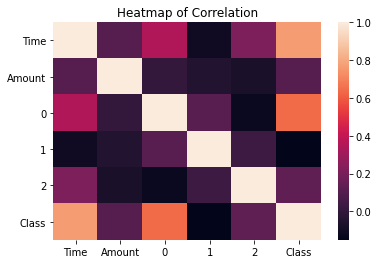

In [60]:
sns.heatmap(data = pd.concat([x,y_df], axis = 1).corr())
plt.title("Heatmap of Correlation")

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y_df, test_size = 0.2, random_state = 42 )

In [0]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)


In [82]:
score = logisticRegr.score(x_test, y_test)
print(score)

1.0


In [0]:
pred = logisticRegr.predict(x_test)


Text(0.5, 1.0, 'Confusion Matrix')

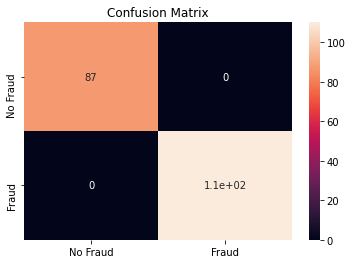

In [108]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,pred)
cm = pd.DataFrame(cm, index = ["No Fraud", "Fraud"], columns=["No Fraud", "Fraud"])
sns.heatmap(cm, annot = True)
plt.title("Confusion Matrix")